In [35]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
baby = pd.read_csv('/content/test.csv')
baby


,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [27]:
smoking_and_age = baby[['Maternal Smoker', 'Maternal Age']]
smoking_and_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [28]:
smoking_and_age['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [40]:
smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [39]:
non_smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

**1)Draw the histograms of the two distributions in the sample(2)**

---

, and state your
inferences(1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f797e1b36a0>,
      dtype=object)

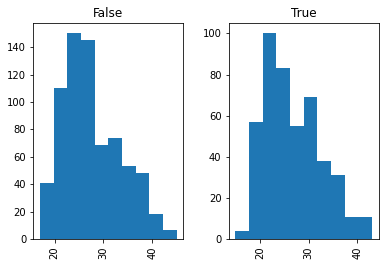

In [29]:
smoking_and_age.hist('Maternal Age','Maternal Smoker')

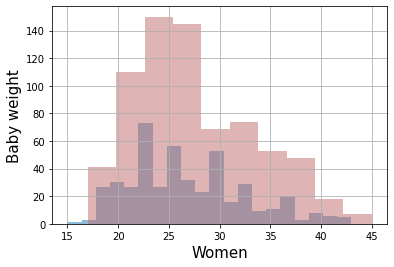

In [41]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

The weight distribution of children born to moms who smoke can be seen to be slightly pushed to the left of the distribution corresponding to moms who did not smoke. The average birth weight of a babies born to a moms who smoke appears to be lower than that of a babies born to a moms who dont smoke.

**2)Which statistical test would you employ?**

**3)State the Null and Alternative Hypothesis **

Null hypothesis: The distribution of birth weights of babies is the same for mothers who smoke as well as who dont smoke. 

Alternative hypothesis: The babies of the mothers who smoke have a lower birth weight on average than the babies of the mothers who are non-smokers.



**4)What statistic do you recommend to apply for this case(2)?**
The alternative hypothesis compares the average Maternal Age of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will do the subtraction in the order average age of the smoking group − average age of the non-smoking group. Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

**5)State the observed statistic**

In [30]:
means_table = smoking_and_age.groupby('Maternal Smoker').mean()
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [24]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

**6)Simulate the test statistic under the Null that will help make the decision**

In [31]:
smoking_and_age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [32]:
differences = np.zeros(5000)
for i in np.arange(5000):
    smoking_and_age = baby[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_and_age.sample(1174,replace = False)
    shuffled_age = shuffled['Maternal Age']
    original_and_shuffled = smoking_and_age.assign(shuffled_age=shuffled_age.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
    differences[i] = difference
differences

array([ 0.23888965, -0.05802215, -0.19395768, ...,  0.29612566,
        0.26393041, -0.23688468])

In [33]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.238890
1,-0.058022
2,-0.193958
3,0.335475
4,-0.498024
...,...
4995,-0.841440
4996,-0.390706
4997,0.296126
4998,0.263930


**7)Draw a histogram to depict what the model of random selection predicts about the
statistic**

Observed Difference: -0.8076725017901509


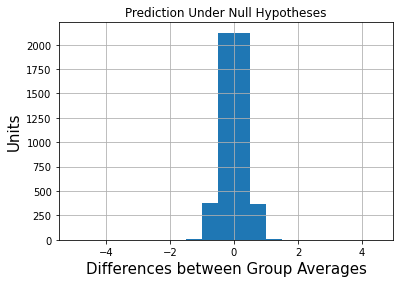

In [36]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

**8)Evaluate the empirical p-value of the test**

In [37]:
p_val = np.count_nonzero(differences <= observed_difference)/differences.size
p_val

0.0104

Emprical p value = 0.104

So the p_val(0.0074) < alpha(0.05), p is significant and null hypothesis can be rejected

**9)What is the outcome of your analysis?**

So the p_val(0.0074) < alpha(0.05), p is significant and null hypothesis can be rejected

